# MECE 6397: Project 2

Syam Evani <br>
07/31/2025 <br>

## <span style="color: blue;">Introduction</span>

###  Table of Contents
1. [Part 1: Timer Illustration](#part-1-timer-illustration)
2. [Data Analysis](#Data-Analysis)
3. [Conclusion](#Conclusion)


My code for this project is included in three ways:
- Embedded in portions with relevant discussion
- Uploaded as part of this deliverable on Canvas
- Available on a public github here: <a> https://github.com/Sam-v6/mece-6397-doe/tree/main/project2 <a>

<a id="part-1-timer-illustration"></a>
## <span style="color: blue;">Part 1: Timer Illustration</span>
I have packaged the provided code and ran it below to illustrate the use of the timer. Note it takes only 0.27 seconds to perform the sample code routine. Timers are excellent for gauging the computational effcicienis (or inefficiencies) as new features are added during a model's implementation. Note, I also have simply packaged this into a `timer.py` file as requested.

In [1]:
# Standard imports
import os
import time

# Additional imports
import pandas as pd
import numpy as np
import itertools
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations

# Local imports
# None

#--------------------------------------------------------------------
# Timing examples
#--------------------------------------------------------------------
class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""

## Illustration of a Class Function Measure Time Performance
class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        """Stop the timer, and report the elapsed time"""
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        elapsed_time_min = (time.perf_counter() - self._start_time)/60
        self._start_time = None
        print(f"Elapsed time: {elapsed_time:0.4f} seconds")
        print(f"Elapsed time: {elapsed_time_min:0.4f} minutes")

#--------------------------------------------------------------------
# Create design
#--------------------------------------------------------------------
# Define the factors and levels
factors = {
    'n_estimators': ['-', '+'],
    'max_depth': ['-', '+']
}

# Create a full factorial design
def full_factorial_design(factors):
    import itertools
    levels = list(factors.values())
    design = list(itertools.product(*levels))
    return pd.DataFrame(design, columns=factors.keys())

# Generate the design matrix
design_matrix = full_factorial_design(factors)
print(design_matrix)

#--------------------------------------------------------------------
# Run experiment
#--------------------------------------------------------------------
# Import the time library
t = Timer()
t.start()

# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the experiment configurations (2^2 design)
configurations = [
    {'n_estimators': 100, 'max_depth': 2},
    {'n_estimators': 100, 'max_depth': 10},
    {'n_estimators': 200, 'max_depth': 2},
    {'n_estimators': 200, 'max_depth': 10},
]

results = []

# Run the experiments
for config in configurations:
    clf = RandomForestClassifier(n_estimators=config['n_estimators'], max_depth=config['max_depth'], random_state=42)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    # Store the results
    results.append({
        'n_estimators': config['n_estimators'],
        'max_depth': config['max_depth'],
        'accuracy': accuracy
    })

t.stop()  # A few seconds later

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

  n_estimators max_depth
0            -         -
1            -         +
2            +         -
3            +         +
Elapsed time: 0.2649 seconds
Elapsed time: 0.0044 minutes
   n_estimators  max_depth  accuracy
0           100          2       1.0
1           100         10       1.0
2           200          2       1.0
3           200         10       1.0


<br>

## <span style="color: blue;">Part 2: Creating five factor and two level DOE implementation</span>

I've adjusted the provided code to include the 5 factors identified as well as tie them to the provided lower and higher levels. Note, some additional data was also provided but for now I'll use the original factor data to generate the combinations. In total we see 32 combinations between our 5 factors, each with 2 levels.

In [3]:
# Standard imports
import os
import time

# Additional imports
import pandas as pd
import numpy as np
import itertools
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations

# Local imports
# None

#--------------------------------------------------------------------
# Design matrix creation
#--------------------------------------------------------------------
# Define the factors and levels

# Provided values (yields accuracy 1.0 for all combos)
factors = {
    'n_estimators': [50, 100],
    'max_depth': [1, 20],
    'min_samples_split': [2, 6],
    'min_samples_leaf': [1, 5],
    'max_samples': [0.5, 0.8]
}

# New factors (yields accuracy 0.3 to 1.0)
# factors = {
#     'n_estimators': [5, 50],
#     'max_depth': [1, 10],
#     'min_samples_split': [2, 10],
#     'min_samples_leaf': [1, 10],
#     'max_samples': [0.1, 0.9]
# }

# Create a full factorial design
def full_factorial_design(factors):
    levels = list(factors.values())
    design = list(itertools.product(*levels))
    return pd.DataFrame(design, columns=factors.keys())

# Generate the design matrix
design_matrix = full_factorial_design(factors)
print(design_matrix)

    n_estimators  max_depth  min_samples_split  min_samples_leaf  max_samples
0             50          1                  2                 1          0.5
1             50          1                  2                 1          0.8
2             50          1                  2                 5          0.5
3             50          1                  2                 5          0.8
4             50          1                  6                 1          0.5
5             50          1                  6                 1          0.8
6             50          1                  6                 5          0.5
7             50          1                  6                 5          0.8
8             50         20                  2                 1          0.5
9             50         20                  2                 1          0.8
10            50         20                  2                 5          0.5
11            50         20                  2                 5

<br>
A full table of our design can be found below:

| n_estimators | max_depth | min_samples_split | min_samples_leaf | max_samples |
|--------------|-----------|-------------------|------------------|-------------|
| 50           | 1         | 2                 | 1                | 0.5         |
| 50           | 1         | 2                 | 1                | 0.8         |
| 50           | 1         | 2                 | 5                | 0.5         |
| 50           | 1         | 2                 | 5                | 0.8         |
| 50           | 1         | 6                 | 1                | 0.5         |
| 50           | 1         | 6                 | 1                | 0.8         |
| 50           | 1         | 6                 | 5                | 0.5         |
| 50           | 1         | 6                 | 5                | 0.8         |
| 50           | 20        | 2                 | 1                | 0.5         |
| 50           | 20        | 2                 | 1                | 0.8         |
| 50           | 20        | 2                 | 5                | 0.5         |
| 50           | 20        | 2                 | 5                | 0.8         |
| 50           | 20        | 6                 | 1                | 0.5         |
| 50           | 20        | 6                 | 1                | 0.8         |
| 50           | 20        | 6                 | 5                | 0.5         |
| 50           | 20        | 6                 | 5                | 0.8         |
| 100          | 1         | 2                 | 1                | 0.5         |
| 100          | 1         | 2                 | 1                | 0.8         |
| 100          | 1         | 2                 | 5                | 0.5         |
| 100          | 1         | 2                 | 5                | 0.8         |
| 100          | 1         | 6                 | 1                | 0.5         |
| 100          | 1         | 6                 | 1                | 0.8         |
| 100          | 1         | 6                 | 5                | 0.5         |
| 100          | 1         | 6                 | 5                | 0.8         |
| 100          | 20        | 2                 | 1                | 0.5         |
| 100          | 20        | 2                 | 1                | 0.8         |
| 100          | 20        | 2                 | 5                | 0.5         |
| 100          | 20        | 2                 | 5                | 0.8         |
| 100          | 20        | 6                 | 1                | 0.5         |
| 100          | 20        | 6                 | 1                | 0.8         |
| 100          | 20        | 6                 | 5                | 0.5         |
| 100          | 20        | 6                 | 5                | 0.8         |


<br>

## <span style="color: blue;">Part 3: Modifying full factorial design to output a dictionary </span>

I've modified the original `full_factorial_design` function and converted it to `generate_full_factorial_design`. The main changes are I now iterate through the items in design (a list itself) and create a small dictionary that has the keys and value pairs. I continue to do this until I have all combinations saved and return a list. The output is printed to give an illustration of what this looks like. <br>

As an example use of our return (`design_matrix`), if we wanted the number of estimators for the first combination we could access this like `design_matrix[0]["n_estimators"]`

In [4]:
# Standard imports
import os
import time

# Additional imports
import pandas as pd
import numpy as np
import itertools
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations

# Local imports
# None

#--------------------------------------------------------------------
# Design matrix creation
#--------------------------------------------------------------------
# Define the factors and levels

# Provided values (yields accuracy 1.0 for all combos)
factors = {
    'n_estimators': [50, 100],
    'max_depth': [1, 20],
    'min_samples_split': [2, 6],
    'min_samples_leaf': [1, 5],
    'max_samples': [0.5, 0.8]
}

# New factors (yields accuracy 0.3 to 1.0)
# factors = {
#     'n_estimators': [5, 50],
#     'max_depth': [1, 10],
#     'min_samples_split': [2, 10],
#     'min_samples_leaf': [1, 10],
#     'max_samples': [0.1, 0.9]
# }

# Create a full factorial design
def generate_full_factorial_design(factors):
    levels = list(factors.values())
    design = list(itertools.product(*levels))

    # Convert each combination into a dictionary
    design_matrix = []
    for combo in design:
        single_design = {}
        for i, factor in enumerate(factors.keys()):
            single_design[factor] = combo[i]
        design_matrix.append(single_design)

    # Return list that has dicts inside
    return design_matrix

# Generate the design matrix
design_matrix = generate_full_factorial_design(factors)
print(design_matrix)


[{'n_estimators': 50, 'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_samples': 0.5}, {'n_estimators': 50, 'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_samples': 0.8}, {'n_estimators': 50, 'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_samples': 0.5}, {'n_estimators': 50, 'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_samples': 0.8}, {'n_estimators': 50, 'max_depth': 1, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_samples': 0.5}, {'n_estimators': 50, 'max_depth': 1, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_samples': 0.8}, {'n_estimators': 50, 'max_depth': 1, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_samples': 0.5}, {'n_estimators': 50, 'max_depth': 1, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_samples': 0.8}, {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_samples': 0.5}, {'n_estimators': 50, 'max_depth': 20, 'min_samples_sp

<br>

## <span style="color: blue;">Part 4: Updating the Random Forest Optimization Model </span>

With some simple edits of adding our additional factors we can use the random forest optimization model to assess the different factors.

In [7]:
#--------------------------------------------------------------------
# Run experiment
#--------------------------------------------------------------------
# Import the time library
t = Timer()
t.start()

# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results = []

# Run the experiments
for config in design_matrix:
    clf = RandomForestClassifier(n_estimators=config['n_estimators'], max_depth=config['max_depth'], min_samples_split=config['min_samples_split'], min_samples_leaf=config['min_samples_leaf'], bootstrap=True, max_samples=config['max_samples'], random_state=42)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    # Store the results
    results.append({
        'n_estimators': config['n_estimators'],
        'max_depth': config['max_depth'],
        'min_samples_split': config['min_samples_split'],
        'min_samples_leaf': config['min_samples_leaf'],
        'max_samples': config['max_samples'],
        'accuracy': accuracy
    })

t.stop()  # A few seconds later

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)
print(results_df)

Elapsed time: 1.0591 seconds
Elapsed time: 0.0177 minutes
    n_estimators  max_depth  min_samples_split  min_samples_leaf  max_samples  \
0             50          1                  2                 1          0.5   
1             50          1                  2                 1          0.8   
2             50          1                  2                 5          0.5   
3             50          1                  2                 5          0.8   
4             50          1                  6                 1          0.5   
5             50          1                  6                 1          0.8   
6             50          1                  6                 5          0.5   
7             50          1                  6                 5          0.8   
8             50         20                  2                 1          0.5   
9             50         20                  2                 1          0.8   
10            50         20                  2     

<br>
A picture of our results are provided below. Notice that with default values the accuracy for all combos is 100%

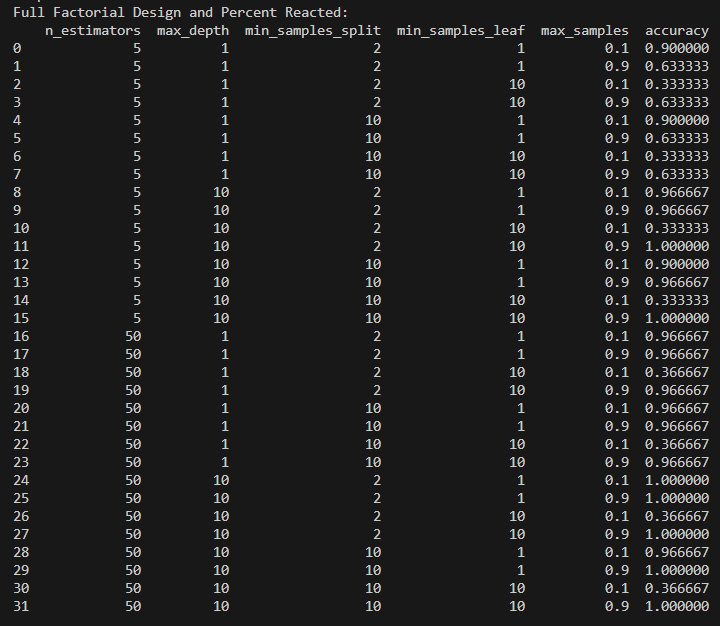

<br>

## <span style="color: blue;">Part 5: Analysis & Recommendations </span>

To asssess the impact of different factors on the accuracy of combinations I did a few things:
- I adjusted the factors to those that were recommended in a follow up annoucnement, these new low and high values for each factor create more variance in accuracy to better see interactions and imapcts of effects
- I evaluted the impact of the main factors independently
- I evaluted the impact of different combinations of factors and calculated the contrast (the difference between the associated low level mean and high level mean which signifies the directional accuracy impact of a combination)

In [10]:
"""
Purpose: Project 2 - Analysze methods for determining a 5 factor, 2 level model with different design combos
Author: Syam Evani
"""

# Standard imports
import os
import time

# Additional imports
import pandas as pd
import numpy as np
import itertools
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations

# Local imports
# None

#--------------------------------------------------------------------
# Timing examples
#--------------------------------------------------------------------
# Illustration of a Class Function for Error Exception
class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""

## Illustration of a Class Function Measure Time Performance
class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        """Stop the timer, and report the elapsed time"""
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        elapsed_time_min = (time.perf_counter() - self._start_time)/60
        self._start_time = None
        print(f"Elapsed time: {elapsed_time:0.4f} seconds")
        print(f"Elapsed time: {elapsed_time_min:0.4f} minutes")

#--------------------------------------------------------------------
# Design matrix creation
#--------------------------------------------------------------------
# Define the factors and levels

# Provided values (yields accuracy 1.0 for all combos)
# factors = {
#     'n_estimators': [50, 100],
#     'max_depth': [1, 20],
#     'min_samples_split': [2, 6],
#     'min_samples_leaf': [1, 5],
#     'max_samples': [0.5, 0.8]
# }

# New factors (yields accuracy 0.3 to 1.0)
factors = {
    'n_estimators': [5, 50],
    'max_depth': [1, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 10],
    'max_samples': [0.1, 0.9]
}

# Create a full factorial design
def generate_full_factorial_design(factors):
    levels = list(factors.values())
    design = list(itertools.product(*levels))

    # Convert each combination into a dictionary
    design_matrix = []
    for combo in design:
        single_design = {}
        for i, factor in enumerate(factors.keys()):
            single_design[factor] = combo[i]
        design_matrix.append(single_design)

    # Return list that has dicts inside
    return design_matrix

# Generate the design matrix
design_matrix = generate_full_factorial_design(factors)

#--------------------------------------------------------------------
# Run experiment
#--------------------------------------------------------------------
# Import the time library
t = Timer()
t.start()

# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results = []

# Run the experiments
for config in design_matrix:
    clf = RandomForestClassifier(n_estimators=config['n_estimators'], max_depth=config['max_depth'], min_samples_split=config['min_samples_split'], min_samples_leaf=config['min_samples_leaf'], bootstrap=True, max_samples=config['max_samples'], random_state=42)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    # Store the results
    results.append({
        'n_estimators': config['n_estimators'],
        'max_depth': config['max_depth'],
        'min_samples_split': config['min_samples_split'],
        'min_samples_leaf': config['min_samples_leaf'],
        'max_samples': config['max_samples'],
        'accuracy': accuracy
    })

t.stop()  # A few seconds later

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)

#--------------------------------------------------------------------
# Assess the impact of main factors
#--------------------------------------------------------------------
main_effects = {}
for factor in factors.keys():
    main_effects[factor] = results_df.groupby(factor)['accuracy'].mean()

#------------------------------------------------------------------------
# Assess the impact of interactions
#------------------------------------------------------------------------
# Calculate interaction effects
interaction_effects = {}
factor_names = list(factors.keys())
for r in range(2, len(factor_names) + 1):
    for combo in combinations(factor_names, r):
        interaction_term = ' x '.join(combo)
        interaction_effects[interaction_term] = results_df.groupby(list(combo))['accuracy'].mean().unstack()

#------------------------------------------------------------------------
# Generate contrast Output
#------------------------------------------------------------------------
contrast_output = pd.DataFrame(columns=['Factor/Interaction', 'Low Level Mean', 'High Level Mean', 'Effect'])
contrast_rows = []

# Calculate contrast for main effects
for factor in factors.keys():
    low_level_mean = main_effects[factor].iloc[0]
    high_level_mean = main_effects[factor].iloc[1]
    effect = high_level_mean - low_level_mean
    contrast_rows.append({
        'Factor/Interaction': factor,
        'Low Level Mean': low_level_mean,
        'High Level Mean': high_level_mean,
        'Effect': effect
    })

# Calculate contrast for interaction effects
for interaction_term, interaction_data in interaction_effects.items():
    for idx, (level, row) in enumerate(interaction_data.iterrows()):
        low_level_mean = row.iloc[0]
        high_level_mean = row.iloc[1]
        effect = high_level_mean - low_level_mean
        contrast_rows.append({
            'Factor/Interaction': f'{interaction_term} (Level {level})',
            'Low Level Mean': low_level_mean,
            'High Level Mean': high_level_mean,
            'Effect': effect
        })

# Save contrast and sort from highest to lowest
contrast_output = pd.DataFrame(contrast_rows)
contrast_output = contrast_output.sort_values(by='Effect', ascending=False)

#------------------------------------------------------------------------
# Print design, main effects contrast, and overall constrast rankings
#------------------------------------------------------------------------
# Print design
print("Accuracy Report:")
print(results_df)

# Print main effects constrast
print("\nMain Effects:")
for factor, effects in main_effects.items():
    print(f"\n{factor}:")
    print(effects)

# Save contrast to text file for interactions
with open(os.path.join(os.getenv('USERPROFILE'),"repos","mece-6397-doe","project2","output","contrast_output.txt"), "w") as file:
    file.write(contrast_output.to_string(index=False))

# Print overall rankings
with open(os.path.join(os.getenv('USERPROFILE'),"repos","mece-6397-doe","project2","output","contrast_output.txt")) as file:
    contents = file.read()
print(contents)

Elapsed time: 0.4008 seconds
Elapsed time: 0.0067 minutes

Main Effects:

n_estimators:
n_estimators
5     0.716667
50    0.827083
Name: accuracy, dtype: float64

max_depth:
max_depth
1     0.720833
10    0.822917
Name: accuracy, dtype: float64

min_samples_split:
min_samples_split
2     0.77500
10    0.76875
Name: accuracy, dtype: float64

min_samples_leaf:
min_samples_leaf
1     0.91875
10    0.62500
Name: accuracy, dtype: float64

max_samples:
max_samples
0.1    0.647917
0.9    0.895833
Name: accuracy, dtype: float64
                                                                                    Factor/Interaction  Low Level Mean  High Level Mean    Effect
                         n_estimators x max_depth x min_samples_leaf x max_samples (Level (5, 10, 10))        0.333333         1.000000  0.666667
 n_estimators x max_depth x min_samples_split x min_samples_leaf x max_samples (Level (5, 10, 10, 10))        0.333333         1.000000  0.666667
  n_estimators x max_depth x min_sam

<br>

Firstly, our new accuracy report with these updated factor value yields the image below. Note the factors that yield the highest accuracy (1.0) are the following and are combos I would suggest for best accuracy:
- number of estimators: 5, max depth: 10, minimum samples split: 2, minimum samples leaf: 10, maximum samples: 0.9
- number of estimators: 5, max depth: 10, minimum samples split: 10, minimum samples leaf: 10, maximum samples: 0.9
- number of estimators: 50, max depth: 10, minimum samples split: 2, minimum samples leaf: 10, maximum samples: 0.1
- number of estimators: 50, max depth: 10, minimum samples split: 2, minimum samples leaf: 10, maximum samples: 0.9
- number of estimators: 50, max depth: 10, minimum samples split: 10, minimum samples leaf: 1, maximum samples: 0.9
- number of estimators: 50, max depth: 10, minimum samples split: 10, minimum samples leaf: 10, maximum samples: 0.9


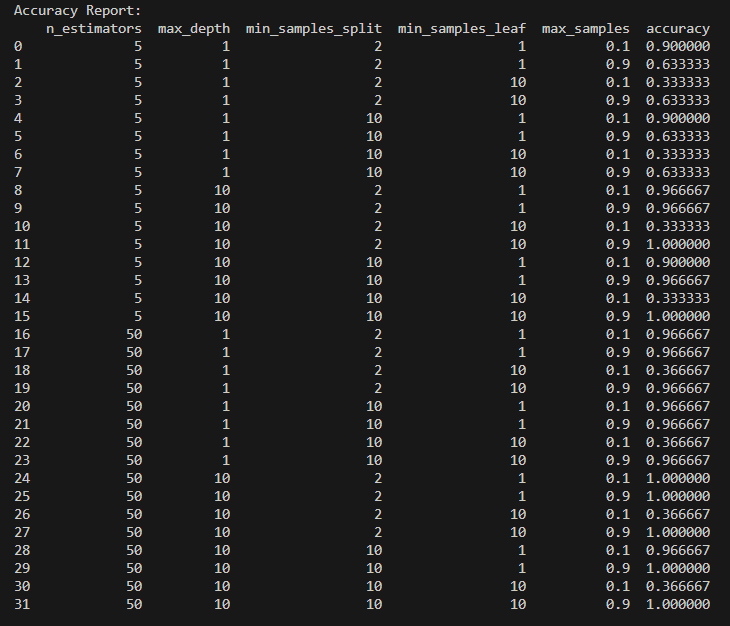
<br>

The complete interaction and contrast report is provided below. Perhaps the most clear takeway is increasing maximum samples has a strong impact on increasing accuracy. Following that, several complex relationships exist, most notably those combos of factors that combine to form a perfect accuracy.

<br>


| Factor/Interaction                                                                 | Low Level Mean | High Level Mean | Effect   |
|------------------------------------------------------------------------------------|----------------|-----------------|----------|
| n_estimators x max_depth x min_samples_leaf x max_samples (Level (5, 10, 10))      | 0.333333       | 1.000000        | 0.666667 |
| n_estimators x max_depth x min_samples_split x min_samples_leaf x max_samples (Level (5, 10, 10, 10)) | 0.333333 | 1.000000 | 0.666667 |
| n_estimators x max_depth x min_samples_split x min_samples_leaf x max_samples (Level (5, 10, 2, 10)) | 0.333333 | 1.000000 | 0.666667 |
| max_depth x min_samples_leaf x max_samples (Level (10, 10))                        | 0.350000       | 1.000000        | 0.650000 |
| max_depth x min_samples_split x min_samples_leaf x max_samples (Level (10, 10, 10)) | 0.350000      | 1.000000        | 0.650000 |
| max_depth x min_samples_split x min_samples_leaf x max_samples (Level (10, 2, 10)) | 0.350000       | 1.000000        | 0.650000 |
| n_estimators x max_depth x min_samples_split x min_samples_leaf x max_samples (Level (50, 10, 2, 10)) | 0.366667 | 1.000000 | 0.633333 |
| n_estimators x max_depth x min_samples_leaf x max_samples (Level (50, 10, 10))     | 0.366667       | 1.000000        | 0.633333 |
| n_estimators x max_depth x min_samples_split x min_samples_leaf x max_samples (Level (50, 10, 10, 10)) | 0.366667 | 1.000000 | 0.633333 |
| n_estimators x min_samples_leaf x max_samples (Level (50, 10))                     | 0.366667       | 0.983333        | 0.616667 |
| n_estimators x min_samples_split x min_samples_leaf x max_samples (Level (50, 10, 10)) | 0.366667    | 0.983333        | 0.616667 |
| n_estimators x min_samples_split x min_samples_leaf x max_samples (Level (50, 2, 10)) | 0.366667     | 0.983333        | 0.616667 |
| n_estimators x max_depth x min_samples_leaf x max_samples (Level (50, 1, 10))      | 0.366667       | 0.966667        | 0.600000 |
| n_estimators x max_depth x min_samples_split x min_samples_leaf x max_samples (Level (50, 1, 10, 10)) | 0.366667 | 0.966667 | 0.600000 |
| n_estimators x max_depth x min_samples_split x min_samples_leaf x max_samples (Level (50, 1, 2, 10)) | 0.366667 | 0.966667 | 0.600000 |
| min_samples_split x min_samples_leaf x max_samples (Level (10, 10))                | 0.350000       | 0.900000        | 0.550000 |
| min_samples_split x min_samples_leaf x max_samples (Level (2, 10))                 | 0.350000       | 0.900000        | 0.550000 |
| min_samples_leaf x max_samples (Level 10)                                          | 0.350000       | 0.900000        | 0.550000 |
| n_estimators x min_samples_split x min_samples_leaf x max_samples (Level (5, 2, 10)) | 0.333333      | 0.816667        | 0.483333 |
| n_estimators x min_samples_split x min_samples_leaf x max_samples (Level (5, 10, 10)) | 0.333333     | 0.816667        | 0.483333 |
| n_estimators x min_samples_leaf x max_samples (Level (5, 10))                      | 0.333333       | 0.816667        | 0.483333 |
| max_depth x min_samples_split x min_samples_leaf x max_samples (Level (1, 10, 10)) | 0.350000       | 0.800000        | 0.450000 |
| max_depth x min_samples_split x min_samples_leaf x max_samples (Level (1, 2, 10))  | 0.350000       | 0.800000        | 0.450000 |
| max_depth x min_samples_leaf x max_samples (Level (1, 10))                         | 0.350000       | 0.800000        | 0.450000 |
| n_estimators x max_depth x min_samples_split x max_samples (Level (5, 10, 10))     | 0.616667       | 0.983333        | 0.366667 |
| n_estimators x max_depth x max_samples (Level (5, 10))                             | 0.633333       | 0.983333        | 0.350000 |
| max_depth x min_samples_split x max_samples (Level (10, 10))                       | 0.641667       | 0.991667        | 0.350000 |
| max_depth x max_samples (Level 10)                                                 | 0.654167       | 0.991667        | 0.337500 |
| n_estimators x max_depth x min_samples_split x max_samples (Level (5, 10, 2))      | 0.650000       | 0.983333        | 0.333333 |
| n_estimators x max_depth x min_samples_split x max_samples (Level (50, 10, 10))    | 0.666667       | 1.000000        | 0.333333 |
| n_estimators x max_depth x max_samples (Level (50, 10))                            | 0.675000       | 1.000000        | 0.325000 |
| max_depth x min_samples_split x max_samples (Level (10, 2))                        | 0.666667       | 0.991667        | 0.325000 |
| n_estimators x min_samples_split x max_samples (Level (50, 10))                    | 0.666667       | 0.983333        | 0.316667 |
| n_estimators x max_depth x min_samples_split x max_samples (Level (50, 10, 2))     | 0.683333       | 1.000000        | 0.316667 |
| n_estimators x max_samples (Level 50)                                              | 0.670833       | 0.983333        | 0.312500 |
| n_estimators x min_samples_split x max_samples (Level (50, 2))                     | 0.675000       | 0.983333        | 0.308333 |
| n_estimators x max_depth x min_samples_split x max_samples (Level (50, 1, 10))     | 0.666667       | 0.966667        | 0.300000 |
| n_estimators x max_depth x max_samples (Level (50, 1))                             | 0.666667       | 0.966667        | 0.300000 |
| n_estimators x max_depth x min_samples_split x max_samples (Level (50, 1, 2))      | 0.666667       | 0.966667        | 0.300000 |
| n_estimators x max_depth x min_samples_split x min_samples_leaf x max_samples (Level (5, 1, 2, 10)) | 0.333333 | 0.633333 | 0.300000 |
| n_estimators x max_depth x min_samples_split x min_samples_leaf x max_samples (Level (5, 1, 10, 10)) | 0.333333 | 0.633333 | 0.300000 |
| n_estimators x max_depth x min_samples_leaf x max_samples (Level (5, 1, 10))       | 0.333333       | 0.633333        | 0.300000 |
| min_samples_split x max_samples (Level 10)                                         | 0.641667       | 0.895833        | 0.254167 |
| max_samples                                                                       | 0.647917       | 0.895833        | 0.247917 |
| min_samples_split x max_samples (Level 2)                                          | 0.654167       | 0.895833        | 0.241667 |
| n_estimators x min_samples_split x max_samples (Level (5, 10))                     | 0.616667       | 0.808333        | 0.191667 |
| n_estimators x min_samples_split x max_samples (Level (5, 2))                      | 0.616667       | 0.808333        | 0.191667 |
| max_depth x min_samples_split x max_samples (Level (1, 10))                        | 0.650000       | 0.825000        | 0.175000 |
| max_depth x max_samples (Level 1)                                                  | 0.654167       | 0.825000        | 0.170833 |
| max_depth x min_samples_split x max_samples (Level (1, 2))                         | 0.666667       | 0.825000        | 0.158333 |
| min_samples_split x max_samples (Level 1)                                          | 0.670833       | 0.820833        | 0.150000 |
| max_depth (Level 1)                                                                | 0.658333       | 0.791667        | 0.133333 |
| n_estimators (Level 5)                                                             | 0.633333       | 0.750000        | 0.116667 |
| n_estimators x max_depth (Level 50)                                                | 0.670833       | 0.766667        | 0.095833 |
| n_estimators (Level 50)                                                            | 0.670833       | 0.750000        | 0.079167 |
| max_depth (Level 10)                                                               | 0.658333       | 0.716667        | 0.058333 |
| n_estimators x max_depth (Level 1)                                                 | 0.666667       | 0.716667        | 0.050000 |
| min_samples_split (Level 1)                                                        | 0.662500       | 0.700000        | 0.037500 |
| n_estimators (Level 1)                                                             | 0.670833       | 0.691667        | 0.020833 |
| min_samples_split (Level 10)                                                       | 0.658333       | 0.675000        | 0.016667 |
| min_samples_split (Level 2)                                                        | 0.662500       | 0.675000        | 0.012500 |

